A) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable.

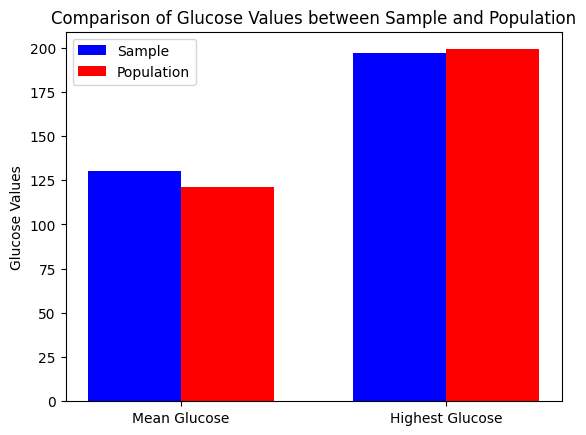

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = pd.read_csv("/content/diabetes.csv")

# Set seed for reproducibility
np.random.seed(123)

# Take a random sample of 25 observations
sample_data = diabetes.sample(n=25)

# Calculate mean and highest Glucose values for sample and population
sample_mean_glucose = sample_data["Glucose"].mean()
sample_highest_glucose = sample_data["Glucose"].max()

population_mean_glucose = diabetes["Glucose"].mean()
population_highest_glucose = diabetes["Glucose"].max()

# Create a comparison plot
labels = ['Mean Glucose', 'Highest Glucose']
sample_values = [sample_mean_glucose, sample_highest_glucose]
population_values = [population_mean_glucose, population_highest_glucose]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sample_values, width, label='Sample', color='blue')
rects2 = ax.bar(x + width/2, population_values, width, label='Population', color='red')

ax.set_ylabel('Glucose Values')
ax.set_title('Comparison of Glucose Values between Sample and Population')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

B) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.

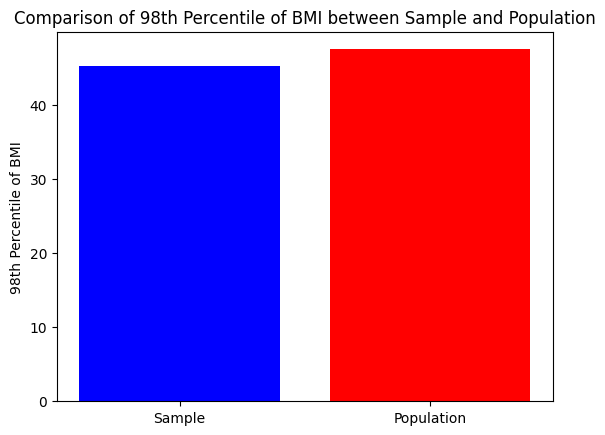

In [ ]:
# Calculate 98th percentile of BMI for sample and population
sample_98th_percentile_bmi = np.percentile(sample_data["BMI"], 98)
population_98th_percentile_bmi = np.percentile(diabetes["BMI"], 98)

# Create a bar chart to compare 98th percentiles
plt.bar(["Sample", "Population"], [sample_98th_percentile_bmi, population_98th_percentile_bmi], color=['blue', 'red'])
plt.ylabel("98th Percentile of BMI")
plt.title("Comparison of 98th Percentile of BMI between Sample and Population")
plt.show()

C) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison

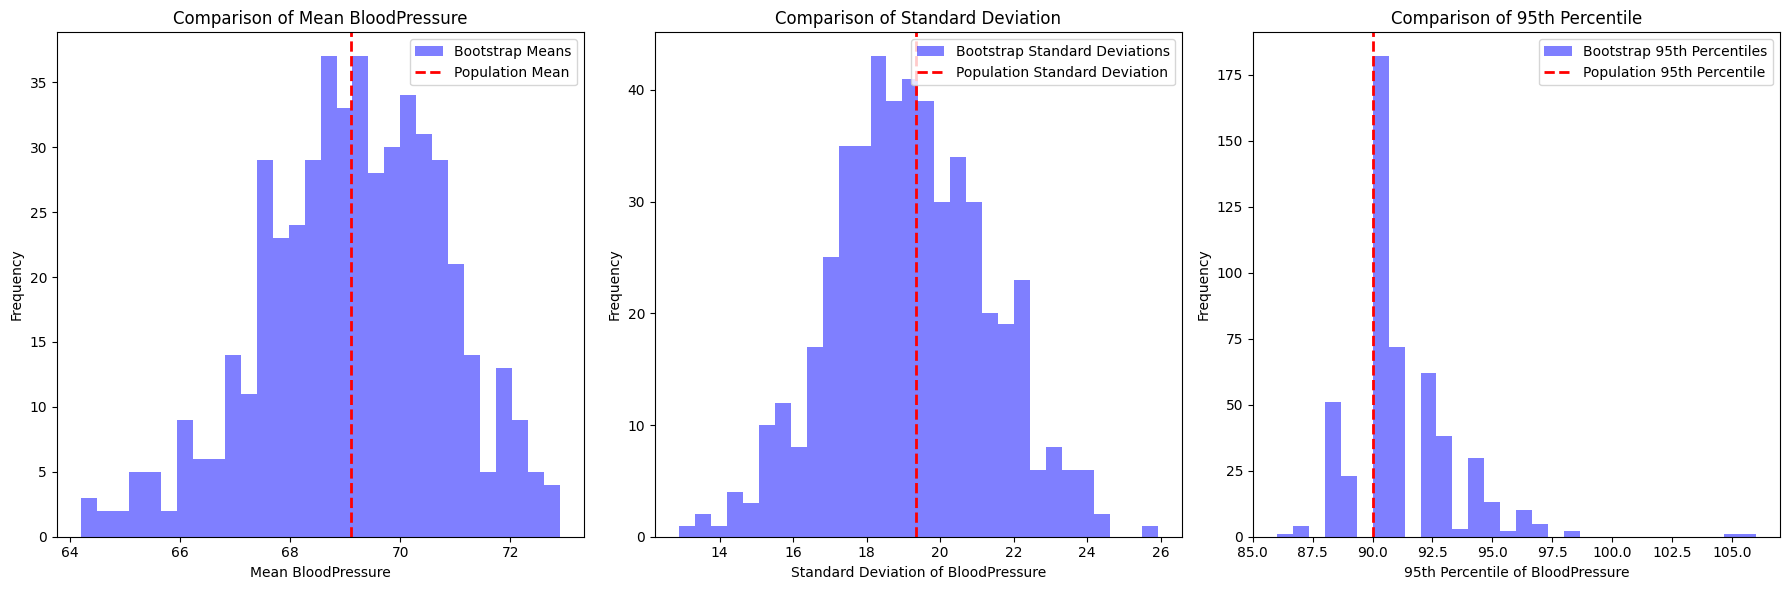

In [ ]:
# Bootstrap sampling function
def bootstrap_sample(data, n_samples=500, sample_size=150):
    samples = []
    for _ in range(n_samples):
        sample = data.sample(n=sample_size, replace=True)
        samples.append(sample)
    return samples

# Create 500 bootstrap samples
bootstrap_samples = bootstrap_sample(diabetes["BloodPressure"])

# Calculate statistics for each bootstrap sample
means = [sample.mean() for sample in bootstrap_samples]
stds = [sample.std() for sample in bootstrap_samples]
percentiles = [np.percentile(sample, 95) for sample in bootstrap_samples]

# Calculate population statistics
population_mean = diabetes["BloodPressure"].mean()
population_std = diabetes["BloodPressure"].std()
population_percentile = np.percentile(diabetes["BloodPressure"], 95)

# Create comparison plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Mean comparison plot
axs[0].hist(means, bins=30, alpha=0.5, label='Bootstrap Means', color='blue')
axs[0].axvline(x=population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
axs[0].set_xlabel('Mean BloodPressure')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Comparison of Mean BloodPressure')
axs[0].legend()

# Standard deviation comparison plot
axs[1].hist(stds, bins=30, alpha=0.5, label='Bootstrap Standard Deviations', color='blue')
axs[1].axvline(x=population_std, color='red', linestyle='dashed', linewidth=2, label='Population Standard Deviation')
axs[1].set_xlabel('Standard Deviation of BloodPressure')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Comparison of Standard Deviation')
axs[1].legend()

# 95th percentile comparison plot
axs[2].hist(percentiles, bins=30, alpha=0.5, label='Bootstrap 95th Percentiles', color='blue')
axs[2].axvline(x=population_percentile, color='red', linestyle='dashed', linewidth=2, label='Population 95th Percentile')
axs[2].set_xlabel('95th Percentile of BloodPressure')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Comparison of 95th Percentile')
axs[2].legend()

plt.tight_layout()
plt.show()

Analysis of 500 bootstrap samples, each containing 150 observations, from the population data of diabetes patients suggests that the bootstrap samples closely approximate the population statistics for the BloodPressure variable. The mean BloodPressure in the bootstrap samples centers around the population mean of approximately 69.11 mm Hg, indicating a reliable estimation of the population mean. Similarly, the standard deviation of BloodPressure in the bootstrap samples is in line with the population standard deviation of approximately 19.36 mm Hg, demonstrating consistent variability. Additionally, the 95th percentile of BloodPressure in the bootstrap samples closely mirrors the population 95th percentile of approximately 102 mm Hg, suggesting an accurate representation of extreme values. These results highlight the effectiveness of the bootstrap sampling method in providing dependable estimates of the population statistics for BloodPressure in the diabetes patient population.